# Encoder-Decoder Analysis

### Model Architecture

In [1]:
report_file = '/Users/bking/IdeaProjects/LanguageModelRNN/reports/encdec_200_512_norem.json'
log_file = '/Users/bking/IdeaProjects/LanguageModelRNN/logs/encdec_200_512_norem_logs.json'

import json
import matplotlib.pyplot as plt
with open(report_file) as f:
    report = json.loads(f.read())
with open(log_file) as f:
    logs = json.loads(f.read())
print'Encoder: \n\n', report['architecture']['encoder']
print'Decoder: \n\n', report['architecture']['decoder']

Encoder: 

nn.Sequential {
  [input -> (1) -> (2) -> output]
  (1): nn.LookupTable
  (2): nn.LSTM(200 -> 512)
}
Decoder: 

nn.gModule


### Perplexity on Each Dataset

In [2]:
print('Train Perplexity: ', report['train_perplexity'])
print('Valid Perplexity: ', report['valid_perplexity'])
print('Test Perplexity: ', report['test_perplexity'])

('Train Perplexity: ', 9.0876709171962)
('Valid Perplexity: ', 25.55261758451)
('Test Perplexity: ', 24.14035993694)


### Loss vs. Epoch

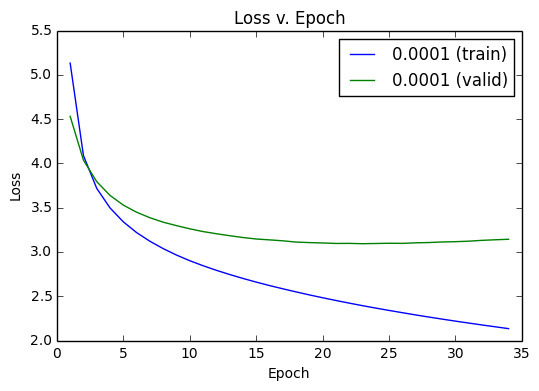

In [3]:
%matplotlib inline
for k in logs.keys():
    plt.plot(logs[k][0], logs[k][1], label=str(k) + ' (train)')
    plt.plot(logs[k][0], logs[k][2], label=str(k) + ' (valid)')
plt.title('Loss v. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Perplexity vs. Epoch

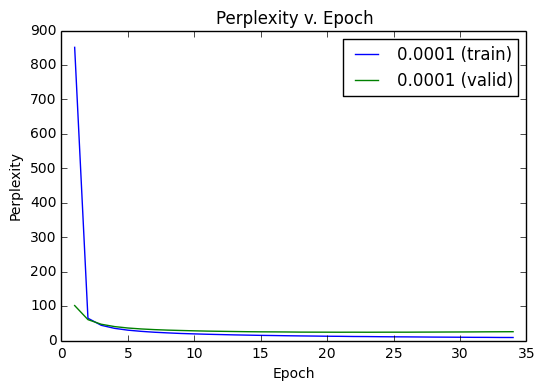

In [4]:
%matplotlib inline
for k in logs.keys():
    plt.plot(logs[k][0], logs[k][3], label=str(k) + ' (train)')
    plt.plot(logs[k][0], logs[k][4], label=str(k) + ' (valid)')
plt.title('Perplexity v. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Perplexity')
plt.legend()
plt.show()

### Generations

In [5]:
def print_sample(sample):
    enc_input = ' '.join([w for w in sample['encoder_input'].split(' ') if w != '<pad>'])
    gold = ' '.join([w for w in sample['gold'].split(' ') if w != '<mask>'])
    print('Input: '+ enc_input + '\n')
    print('Gend: ' + sample['generated'] + '\n')
    print('True: ' + gold + '\n')
    print('\n')
    

In [6]:
for sample in report['train_samples']:
    print_sample(sample)

Input:  thai - style chicken coleslaw <begin_ingredients> 2 small shallots , finely chopped <ing> 1 red chili , fresh , seeded and finely chopped <ing> 2 tablespoons honey <ing> 1 / 4 cup rice vinegar <ing> 1 lime , juice of <ing> 3 tablespoons fish sauce <ing> 3 tablespoons soy sauce <ing> 1 tablespoon chives , finely chopped fresh chives <ing> 2 chicken fillets , cooked and shredded <ing> 1 / 2 a medium cabbage , finely shredded <ing> 2 carrots , medium size , cut into very thin strips <ing> 6 mint leaves , finely chopped <ing> 1 / 4 cup coriander , lightly chopped <ing> 1 / 4 cup peanuts , coarsely chopped <ing> 3 - 4 slices pink pickled ginger ( to garnish ) <end>

Gend:  <beg> 1 . in a large bowl , combine the rice , rice , rice vinegar , rice wine , and rice . stir . add the rice and stir . cover and cook on low for 8 to 10 hours

True:  place the chicken in a large serving bowl . <step> combine the shallots , chilli , honey , rice vinegar , fish sauce , lime juice , soy sauce an

In [7]:
for sample in report['valid_samples']:
    print_sample(sample)

Input:  salmon burger with baby spinach <begin_ingredients> 2 hamburger buns <ing> 1 can ( 7.5 ounces ) salmon , drained and flaked <ing> 1 / 2 celery stalk , finely chopped ( 2 tablespoons ) <ing> 1 / 2 shallot , finely chopped ( 1 tablespoon ) <ing> 1 tablespoon mayonnaise , plus more for serving <ing> coarse salt and ground pepper <ing> coarse salt and ground pepper <ing> 2 teaspoons extra - virgin olive oil <ing> baby spinach , for serving <end>

Gend:  <beg> in a large bowl , combine the chicken , onion , garlic , onion , garlic , and red pepper flakes ; season with salt and pepper . <step> in a large skillet , heat the oil over medium -

True:  in a food processor , pulse 1 bun until fine crumbs form ( you should have about 1 / 4 cup ) . transfer breadcrumbs to a large bowl and add salmon , celery , shallot , and mayonnaise . season with salt and pepper ; mix well to combine . form into a 3 / 4 - inch - thick patty , transfer to a plate , and refrigerate 10 minutes . <step> in a 

In [8]:
for sample in report['test_samples']:
    print_sample(sample)

Input:  mediterranean sandwich <begin_ingredients> 2 tsps . olive oil <ing> 1 tsp . balsamic vinegar <ing> 1 chicken breast <ing> 1 crusty bread , sliced <ing> 3 sun dried tomatoes , chopped <ing> feta cheese , sliced ( or goat cheese ) <ing> basil ( optional ) <end>

Gend:  <beg> heat the oil in a large skillet over medium heat . add the onion and cook , stirring occasionally , until the onions are soft and translucent , about 5 minutes . add the garlic and cook for 1 minute

True:  mix the olive oil and balsamic vinegar . set aside . <step> cook the chicken breast and cut into strips . <step> warm the bread on both sides . <step> drizzle some of the dressing onto the bottom half of the bread , then add the chicken , tomatoes , cheese , and basil . pour the rest of the dressing on top , cover with the top half of the bread , and serve . <end>



Input:  easy homemade pizza sauce <begin_ingredients> 1 ( 6 ounce ) can tomato paste <ing> 1 / 3 cup water <ing> ¼ teaspoon dried basil <ing>

### BLEU Analysis

In [9]:
print 'Overall Score: ', report['bleu']['score'], '\n'
print '1-gram Score: ', report['bleu']['components']['1']
print '2-gram Score: ', report['bleu']['components']['2']
print '3-gram Score: ', report['bleu']['components']['3']
print '4-gram Score: ', report['bleu']['components']['4']

Overall Score:  0.02 

1-gram Score:  49.6
2-gram Score:  15.8
3-gram Score:  6.2
4-gram Score:  2.4
